In [1]:
import pandas as pd
import glob

path_1 = r'C:\Users\flori\OneDrive\Documents\Logitech\tests\rocket-meister\results\7_lidar' # use your path
path_3 = r'C:\Users\flori\OneDrive\Documents\Logitech\tests\rocket-meister\results\25_lidar_120degrees' # use your path
path_2 = r'C:\Users\flori\OneDrive\Documents\Logitech\tests\rocket-meister\results\25_lidar_360' # use your path
path_4 = r'C:\Users\flori\OneDrive\Documents\Logitech\tests\rocket-meister\results\25_lidar_front' # use your path
paths = [path_1,path_2,path_3,path_4]
df7=pd.DataFrame()
df25f=pd.DataFrame()
df25120=pd.DataFrame()
df25360=pd.DataFrame()
counter=1
for path in paths:

    df = pd.DataFrame()
    all_files = glob.glob(path + "/*.csv")

    li = []

    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        li.append(df)

    df = pd.concat(li, axis=0, ignore_index=True)
    df = df.drop_duplicates(subset=['Step'])
    if counter==1:
        df7 = df
    if counter==2:
        df25120 = df
    if counter==3:
        df25360 = df
    if counter==4:
        df25f = df
    counter+=1

In [8]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
plt.rcParams["figure.figsize"] = (10,3)
import numpy as np
def plot_reward(df):
    ax = plt.gca()
    df.plot(kind='line',x='Step',y='Value',ax=ax)
    import numpy as np

    y_p = np.diff(df['Value']) / np.diff(df['Step'])
    x_p = (np.array(df['Step'])[:-1] + np.array(df['Step'])[1:]) / 2

    plt.figure()
    plt.plot(x_p,y_p, 'r',label='Derivative')
    plt.legend()
    plt.show()
    
dfs = [df7,df25120,df25360,df25f]
dfs_name=['7lidar','25lidar120','25lidar360','25lidar_front']
def plot_all_reward(dfs,dfs_name):
    for df in dfs:
        ax = plt.gca()
        df.plot(kind='line',x='Step',y='Value',ax=ax)
        ax.legend(dfs_name)
    plt.figure()
    for df in dfs:
        ax = plt.gca()
        X_Y_Spline = interp1d(df.Step, df.Value,kind='cubic')
        X_ = np.linspace(df.Step.min(), df.Step.max(), 100)
        Y_ = X_Y_Spline(X_)
        plt.plot(X_,Y_)
        ax.legend(dfs_name)
    
    

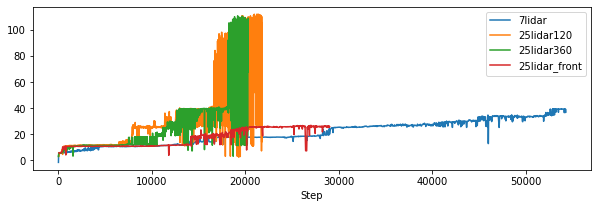

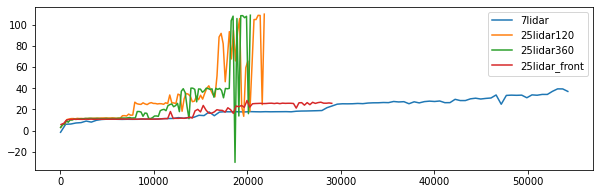

In [9]:
plot_all_reward(dfs,dfs_name)

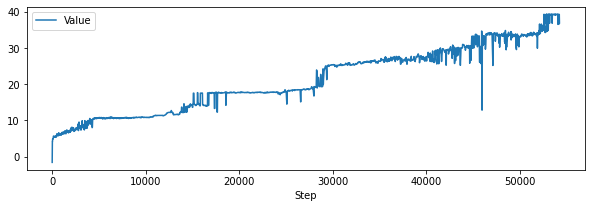

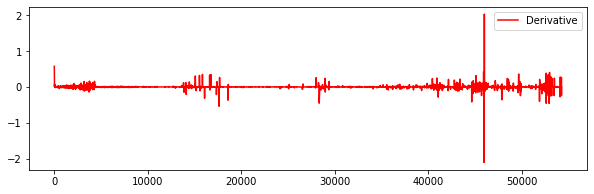

In [10]:
plot_reward(df7)


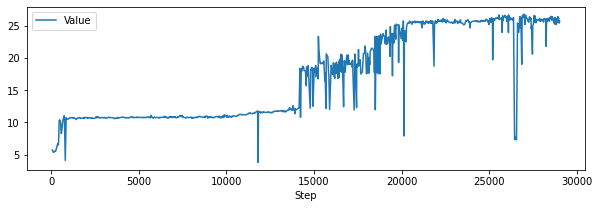

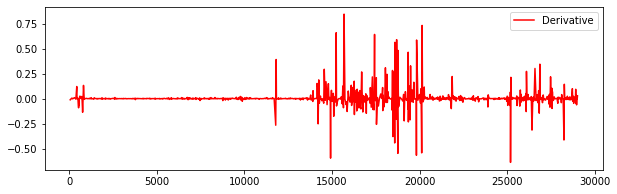

In [11]:
plot_reward(df25f)

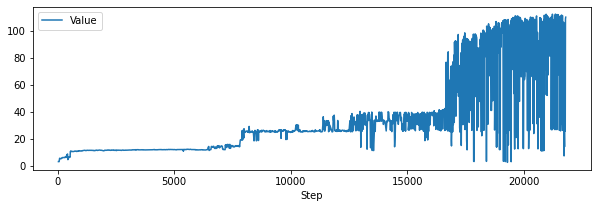

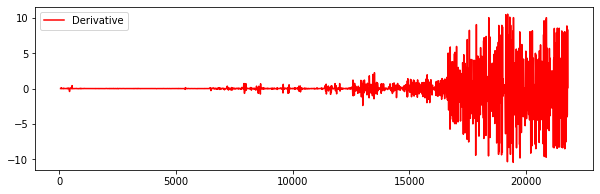

In [12]:
plot_reward(df25120)

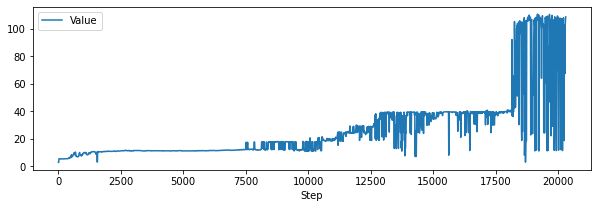

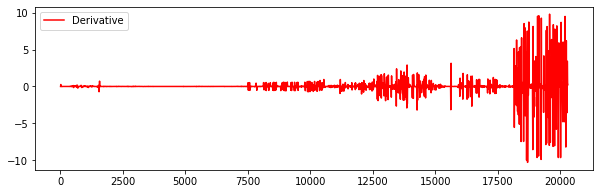

In [13]:
plot_reward(df25360)